In [1]:
# Imoprt data and packages 
# Data Wrangling [ Clening ] for analysis 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import re
from collections import defaultdict


In [3]:
test = pd.read_csv('D:\HATHWAY ISP\DSC\Project\Housing\\test.csv')
train = pd.read_csv('D:\HATHWAY ISP\DSC\Project\Housing\\train.csv')
test_Id = test['Id']
train.drop('Id', axis = 1, inplace = True)
test.drop('Id', axis = 1, inplace = True)

In [4]:
# Rows and Columns avilable in test data frame 
test.shape

(1459, 79)

In [5]:
# Rows and Columns avilable in train data frame 
train.shape

(1460, 80)

In [6]:
# Fetures Avilable in train  
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [7]:
# Fetures Avilable in train  
test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [8]:
# Extra Fetures Avilable in train  
set(train.columns).difference(set(test.columns))

{'SalePrice'}

In [9]:
# Shows First Few rows of the data frame 
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [10]:
# Shows Last few rows of the data frame 
test.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [11]:
# Analysis of the Numeric Columns of the test data frame 
test.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [12]:
# Analysis of the Numeric Columns of the train data frame 
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
# Identifing the Missing values in the Data Frame 
test['PoolQC'].value_counts(dropna=False)

NaN    1456
Ex        2
Gd        1
Name: PoolQC, dtype: int64

In [14]:
# Visual inspection of Sorted Missing values for every variable  
Col = test.isnull().sum() > 10
test.isnull().sum().sort_values(ascending=False)[ Col ]

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageFinish      78
GarageYrBlt       78
GarageQual        78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
dtype: int64

In [15]:
# Cross Check - Missing Value Count of one of the variable 
test['Alley'].value_counts(dropna=False)

NaN     1352
Grvl      70
Pave      37
Name: Alley, dtype: int64

In [16]:
# Visual inspection of avilable data points of every variable  
test.notnull().sum().sort_values(ascending=False)

SaleCondition    1459
YearBuilt        1459
LowQualFinSF     1459
2ndFlrSF         1459
1stFlrSF         1459
Electrical       1459
CentralAir       1459
Heating          1459
Foundation       1459
ExterCond        1459
ExterQual        1459
RoofMatl         1459
RoofStyle        1459
YearRemodAdd     1459
OverallCond      1459
FullBath         1459
OverallQual      1459
HouseStyle       1459
BldgType         1459
Condition2       1459
Condition1       1459
Neighborhood     1459
LandSlope        1459
LotConfig        1459
LandContour      1459
LotShape         1459
Street           1459
LotArea          1459
GrLivArea        1459
HeatingQC        1459
                 ... 
GarageArea       1458
GarageCars       1458
Exterior1st      1458
TotalBsmtSF      1458
SaleType         1458
KitchenQual      1458
BsmtFinSF1       1458
BsmtHalfBath     1457
Utilities        1457
BsmtFullBath     1457
Functional       1457
MSZoning         1455
MasVnrArea       1444
MasVnrType       1443
BsmtFinTyp

In [17]:
# If we drop all missing values then data frame will be empty 
test.dropna()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


In [18]:
# Fill missing data with 0 in numeric column and Missing in categorical column


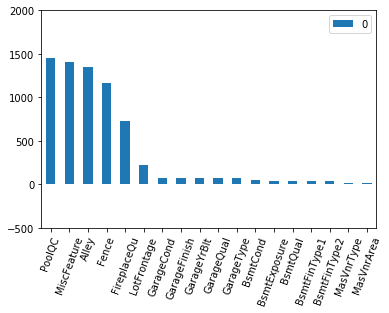

In [19]:
# Plot a graph of Features that contains more than 10 missing values in test data set 
t = test.isnull().sum().sort_values(ascending=False)[test.isnull().sum() > 10 ]
pd.DataFrame(t).plot(kind='bar',rot=70, ylim=[-500,2000], xlim=[0,100])
    

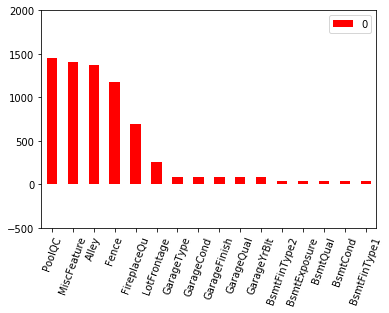

In [20]:
# Plot a graph of Features that contains more than 10 missing values in train  data set 
t1 = train.isnull().sum().sort_values(ascending=False)[train.isnull().sum() > 10 ]
pd.DataFrame(t1).plot(kind='bar',rot=70, ylim=[-500,2000], xlim=[0,100], color='r')

In [21]:
# Read the feature description file and convert it into data frame
file = "D:\HATHWAY ISP\DSC\Project\Housing\\data_description.txt"
feature_list1 = defaultdict()
feature_list2 = defaultdict()
s = ''
with open(file) as fp:
    for line in fp:
        if re.search(':', line):#n test.columns+':':
            if line.split()[0] in test.columns+':':
                s = line.split()[0].replace(':','')
                feature_list1[s] = {}
        else:
            if len(line.split()) != 0:
                feature_list2[line.split()[0]] = line
        feature_list1[s].update(feature_list2)
        feature_list2 = {}
feature_list1_df = pd.DataFrame.from_dict({(i,j): feature_list1[i][j] 
                           for i in feature_list1.keys() 
                           for j in feature_list1[i].keys()},
                       orient='index')

In [22]:
feature_list1_df.columns=['data']
feature_list1_df['data'] = feature_list1_df['data'].str.replace('\t', ' ')
feature_list1_df['data'] = feature_list1_df['data'].str.replace('\n', ' ')
feature_list1_df = feature_list1_df.transpose()
#feature_list1_df

In [23]:
train.select_dtypes(exclude = ["object"]).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [24]:
train.drop('PoolQC', axis = 1, inplace = True)
train.drop('MiscFeature', axis = 1, inplace = True)
train.drop('Fence', axis = 1, inplace = True)
train.drop('Alley', axis = 1, inplace = True)
train.drop('FireplaceQu', axis = 1, inplace = True)
train.drop('LotFrontage', axis = 1, inplace = True)

In [25]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorc

In [26]:
#print(train)
##import seaborn as sns
#sns.heatmap(train)
##plt.figure(figsize = (10,5))
#ax = sns.heatmap(train, linewidths=0.1, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
##ax = sns.heatmap(train, linewidths=0.1, vmin=-1, vmax=1, center=0, cmap=plt.cm.viridis, square=True)
##ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
##ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right');

##plt.title("Covarience Plot")
##plt.show()

In [27]:
train.shape

(1460, 74)

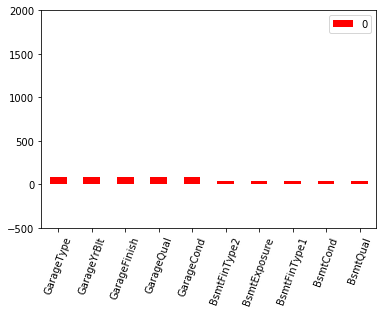

In [28]:
# Plot a graph of Features that contains more than 10 missing values in train  data set 
t1 = train.isnull().sum().sort_values(ascending=False)[train.isnull().sum() > 10 ]
pd.DataFrame(t1).plot(kind='bar',rot=70, ylim=[-500,2000], xlim=[0,100], color='r')

In [29]:
t1

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
BsmtFinType2    38
BsmtExposure    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
dtype: int64

In [30]:
train.select_dtypes(exclude = ["object"]).columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [31]:
cat_features = train.select_dtypes(include = ["object"]).columns # categorical features
num_features = train.select_dtypes(exclude = ["object"]).columns # numerical features

In [32]:
cat_features

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [33]:
num_features

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [34]:
train['GarageYrBlt'] = train['GarageYrBlt'].apply(str)
train['OverallQual'] = train['OverallQual'].apply(str)
train['OverallCond'] = train['OverallCond'].apply(str)
train['YearBuilt'] = train['YearBuilt'].apply(str)
train['YearRemodAdd'] = train['YearRemodAdd'].apply(str)
train['Fireplaces'] = train['Fireplaces'].apply(str)

In [35]:
cat_features = train.select_dtypes(include = ["object"]).columns # categorical features
num_features = train.select_dtypes(exclude = ["object"]).columns # numerical features

In [37]:
cat_features

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [38]:
num_features

Index(['MSSubClass', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

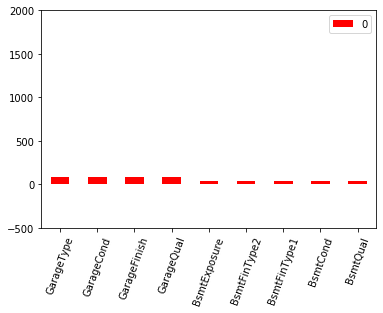

In [39]:
# Plot a graph of Features that contains more than 10 missing values in train  data set 
t1 = train.isnull().sum().sort_values(ascending=False)[train.isnull().sum() > 10 ]
pd.DataFrame(t1).plot(kind='bar',rot=70, ylim=[-500,2000], xlim=[0,100], color='r')

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null object
OverallCond      1460 non-null object
YearBuilt        1460 non-null object
YearRemodAdd     1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
MasVnrArea       1452

In [41]:
train[['MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType' ,'GarageFinish' ,'GarageQual' ,'GarageCond']] = train[['MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType' ,'GarageFinish' ,'GarageQual' ,'GarageCond']].fillna(0)

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null object
OverallCond      1460 non-null object
YearBuilt        1460 non-null object
YearRemodAdd     1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-null object
MasVnrArea       1460

In [43]:
cat_features = train.select_dtypes(include = ["object"]).columns # categorical features
num_features = train.select_dtypes(exclude = ["object"]).columns # numerical features


In [44]:
type(num_features)

pandas.core.indexes.base.Index

In [45]:
train_num = train[num_features]
train_num.index

RangeIndex(start=0, stop=1460, step=1)

In [46]:
train_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 30 columns):
MSSubClass       1460 non-null int64
LotArea          1460 non-null int64
MasVnrArea       1460 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
GarageCars       1460 non-null int64
GarageArea       1460 non-null int64
WoodDeckSF       1460 non-null int64
OpenPorchSF      1460 non-null int64
EnclosedPorch    1460 non-null int64
3SsnPorch        1460 non-null int64
Scr

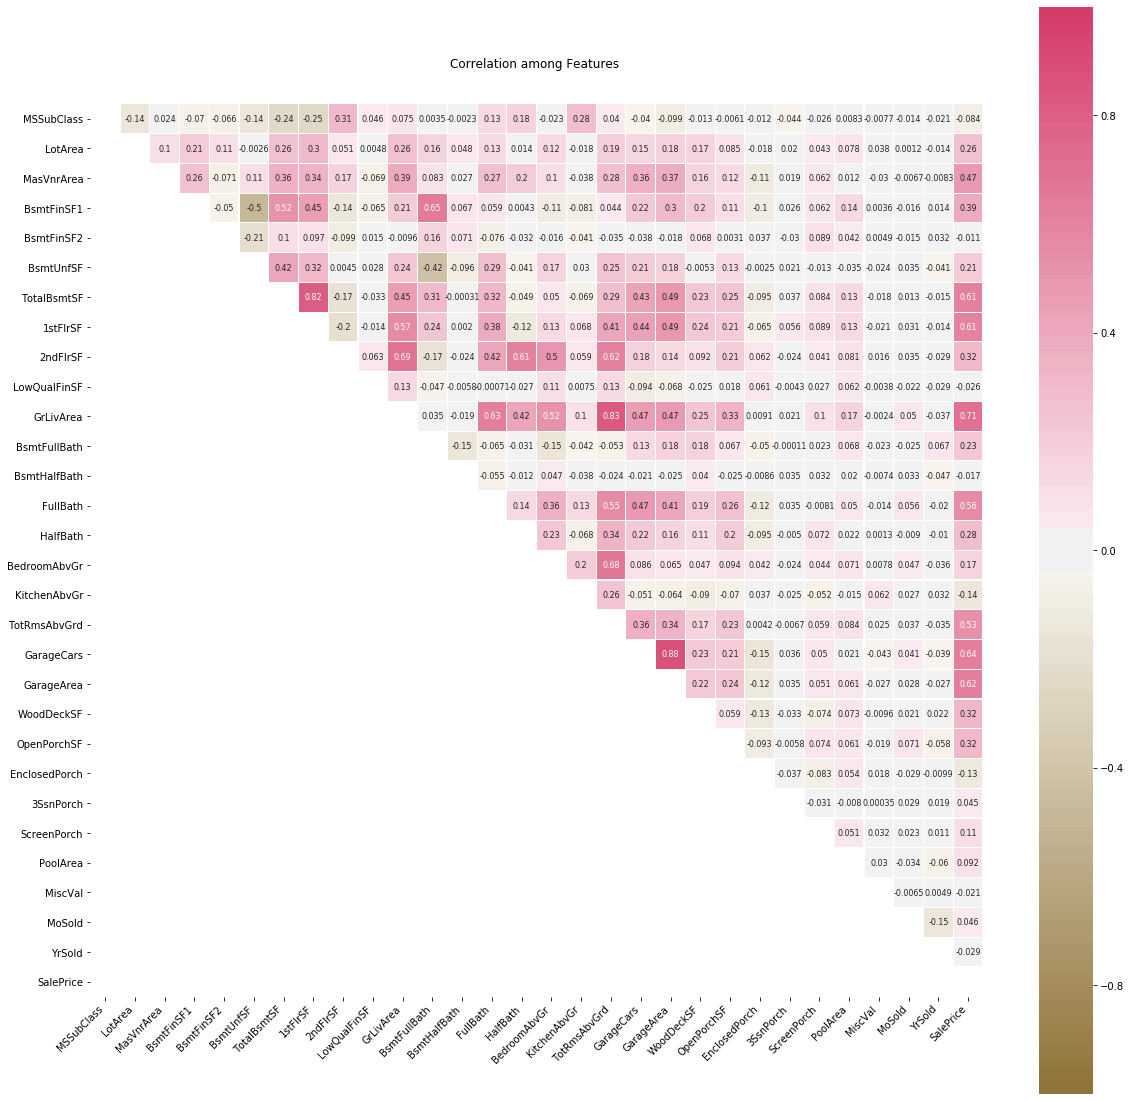

In [49]:
#print(train)
import seaborn as sns
#sns.heatmap(train)
matrix = np.tril(train_num.corr())
plt.figure(figsize = (20,20))
ax = sns.heatmap(train_num.corr(),#.sort_values(by=['SalePrice']), 
                 linewidths=0.1, 
                 vmin=-1, 
                 vmax=1, 
                 center=0, 
                 annot = True,
                 #square = True, 
                 #fmt ='.2f', 
                 annot_kws = {'size': 8},
                 cmap=sns.diverging_palette( 60, 360, n=200), 
                 square=True,
                 mask=matrix)
#ax = sns.heatmap(train_num.corr(), linewidths=0.1, vmin=-1, vmax=1, center=0, cmap=plt.cm.viridis, square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right');

plt.title("Correlation among Features \n\n")
plt.show()

In [50]:
#train_num.corr()

In [51]:
# From the heatmap the following features have insignificant correlation with the target value 'SalePrice'
low_corr_coeff = ['MSSubClass', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath','BsmtUnfSF', 
                  '3SsnPorch','PoolArea', 'MiscVal', 'MoSold', 'YrSold',
                  'KitchenAbvGr','EnclosedPorch', 'ScreenPorch', 'LotArea','BsmtFinSF1','HalfBath']
# drop the features which have minimal corelation with the target variable
train_num = train_num.drop(train_num[low_corr_coeff], axis = 1)
train_num.shape

(1460, 14)

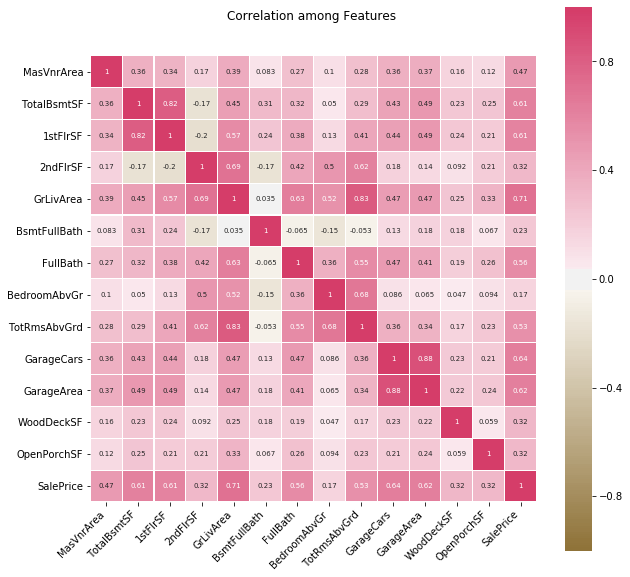

In [52]:
# From the heatmap the following features have insignificant correlation with the target value 'SalePrice'
plt.figure(figsize = (10,10))
ax = sns.heatmap(train_num.corr(), 
                 linewidths=0.1, 
                 vmin=-1, 
                 vmax=1, 
                 center=0, 
                 annot = True,
                 #square = True, 
                 #fmt ='.2f', 
                 annot_kws = {'size': 7},
                 cmap=sns.diverging_palette( 60, 360, n=200), 
                 square=True)
#ax = sns.heatmap(train_num.corr(), linewidths=0.1, vmin=-1, vmax=1, center=0, cmap=plt.cm.viridis, square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right');

plt.title("Correlation among Features \n\n")
plt.show()

In [53]:
feature_high_corr_coeff = ['TotRmsAbvGrd', 'FullBath', '2ndFlrSF', 'GarageCars', 'BsmtFullBath']
train_num = train_num.drop(train_num[feature_high_corr_coeff], axis = 1)
train_num.shape

(1460, 9)

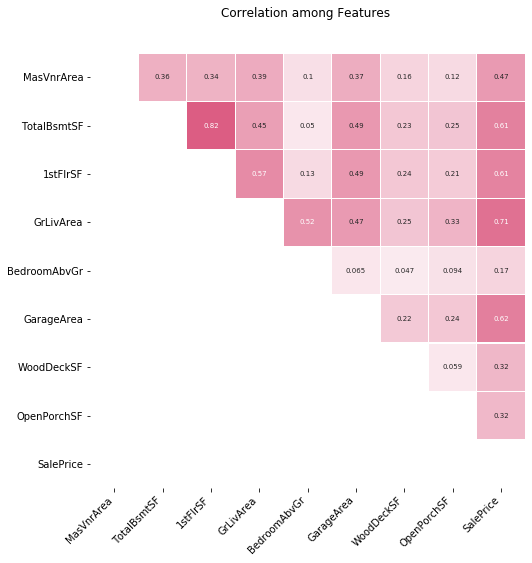

In [54]:
#matrix = np.triu(train_num.corr())
matrix = np.tril(train_num.corr())

midpoint = 0 # (train_num.values.max() - train_num.values.min()) / 2
plt.figure(figsize = (8,8))
ax = sns.heatmap(train_num.corr(), 
                 linewidths=0.1, 
                 vmin=-1, 
                 vmax=1, 
                 center=midpoint, 
                 annot = True,
                 #square = True, 
                 #fmt ='.2f', 
                 #linewidths=3, 
                 #linecolor='black',
                 annot_kws = {'size': 7},
                 cmap=sns.diverging_palette(60, 360, n=200), 
                 square=True,
                 mask=matrix,
                 cbar=False)
#ax = sns.heatmap(train_num.corr(), linewidths=0.1, vmin=-1, vmax=1, center=0, cmap=plt.cm.viridis, square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right');

plt.title("Correlation among Features \n\n")
plt.show()